In [96]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Post Graduate Course in Data Analytics\HACKATHON\JOB-A-THON')

# Since the target variable depicting whether the employee has left the organization or not is not present in train data, we can make the column in csv file itself depending on the LastWorkingDate column. If the LastWorkingDate is null, it means the employee has not left the organization. If there is a date in LastWorkingDate column, it means the employee has left the organization on that particular date. 0 in target means employee has not left whereas 1 means employee has left the organization.

In [97]:
df1=pd.read_csv('train_MpHjUjU.csv')
df1.sample(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
14138,01-08-2017,2109,31,Male,C7,Master,72478,08-10-2016,NaN,2,2,950160,3
4363,01-09-2017,638,37,Male,C16,Master,137911,13-07-2010,NaN,2,4,1403170,3
16219,01-06-2016,2405,36,Male,C7,Master,167758,26-01-2016,NaN,5,5,0,1
17407,01-04-2017,2555,38,Female,C13,College,116077,29-12-2011,NaN,2,4,976320,2
7943,01-03-2017,1181,33,Female,C22,Bachelor,122554,05-11-2012,NaN,1,4,2287040,2
3317,01-03-2017,494,36,Female,C16,Bachelor,110964,08-03-2017,NaN,3,3,2250000,3
8969,01-05-2017,1326,28,Female,C20,Bachelor,41463,14-10-2016,NaN,1,1,0,1
6166,01-01-2016,924,24,Male,C24,Master,60056,08-05-2015,NaN,2,2,302110,1
1884,01-06-2016,295,29,Female,C8,College,35983,05-01-2016,24-06-2016,2,2,0,1
9047,01-06-2017,1335,33,Male,C18,Master,157124,13-08-2012,NaN,2,3,625930,3


In [98]:
df1['Target']=np.where(df1['LastWorkingDate'].isnull(),0,1)
df1

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,01-01-2016,1,28,Male,C23,Master,57387,24-12-2015,NaN,1,1,2381060,2,0
1,01-02-2016,1,28,Male,C23,Master,57387,24-12-2015,NaN,1,1,-665480,2,0
2,01-03-2016,1,28,Male,C23,Master,57387,24-12-2015,11-03-2016,1,1,0,2,1
3,01-11-2017,2,31,Male,C7,Master,67016,06-11-2017,NaN,2,2,0,1,0
4,01-12-2017,2,31,Male,C7,Master,67016,06-11-2017,NaN,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,01-08-2017,2788,30,Male,C27,Master,70254,08-06-2017,NaN,2,2,740280,3,0
19100,01-09-2017,2788,30,Male,C27,Master,70254,08-06-2017,NaN,2,2,448370,3,0
19101,01-10-2017,2788,30,Male,C27,Master,70254,08-06-2017,NaN,2,2,0,2,0
19102,01-11-2017,2788,30,Male,C27,Master,70254,08-06-2017,NaN,2,2,200420,2,0


# Grouping the dataframe with respect to Employee ID and all other columns' latest occurrence because the designation and salary changes

In [99]:
g=df1.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',
                       'Quarterly Rating','Target'].tail(1)

<ipython-input-99-f25233e6a40e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g=df1.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',


In [100]:
#Resetting the index as the original index in dataframe will appear after grouping
g.reset_index(drop=True,inplace=True)

# Grouping the dataframe with respect to Employee ID and sum of Total Business Value as it is total business brought in by the employee for the organization in the given time period

In [101]:
gg=df1.groupby('Emp_ID').agg({'Total Business Value':'sum'})

In [102]:
#Resetting the index
gg.reset_index(drop=True,inplace=True)

In [103]:
#Concatanating both the groups to get a new dataframe
df=pd.concat([g,gg],axis=1,ignore_index=False)
df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
0,1,28,Male,C23,Master,57387,1,1,2,1,1715580
1,2,31,Male,C7,Master,67016,2,2,1,0,0
2,4,43,Male,C13,Master,65603,2,2,1,1,350000
3,5,29,Male,C9,College,46368,1,1,1,1,120360
4,6,31,Female,C11,Bachelor,78728,3,3,2,0,1265000
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2,3,4,0,21748820
2377,2785,34,Female,C9,College,12105,1,1,1,1,0
2378,2786,45,Male,C19,College,35370,2,2,1,1,2815090
2379,2787,28,Female,C20,Master,69498,1,1,1,1,977830


In [104]:
df.shape

(2381, 11)

In [105]:
#Readjusting the column 'Total Business Value'
col=df.pop('Total Business Value')
df.insert(8,'Total Business Value',col)

In [106]:
df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,1715580,2,1
1,2,31,Male,C7,Master,67016,2,2,0,1,0
2,4,43,Male,C13,Master,65603,2,2,350000,1,1
3,5,29,Male,C9,College,46368,1,1,120360,1,1
4,6,31,Female,C11,Bachelor,78728,3,3,1265000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2,3,21748820,4,0
2377,2785,34,Female,C9,College,12105,1,1,0,1,1
2378,2786,45,Male,C19,College,35370,2,2,2815090,1,1
2379,2787,28,Female,C20,Master,69498,1,1,977830,1,1


Viewing the information about the dataset

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                2381 non-null   int64 
 1   Age                   2381 non-null   int64 
 2   Gender                2381 non-null   object
 3   City                  2381 non-null   object
 4   Education_Level       2381 non-null   object
 5   Salary                2381 non-null   int64 
 6   Joining Designation   2381 non-null   int64 
 7   Designation           2381 non-null   int64 
 8   Total Business Value  2381 non-null   int64 
 9   Quarterly Rating      2381 non-null   int64 
 10  Target                2381 non-null   int32 
dtypes: int32(1), int64(7), object(3)
memory usage: 195.4+ KB


In [108]:
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000
mean,1397.559009,33.663167,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.678706
std,806.161628,5.983375,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.467071
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000
25%,695.000000,29.000000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000
50%,1400.000000,33.000000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,1.000000
75%,2100.000000,37.000000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,1.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000


C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Employees leaving the organization (1) or not (0)')

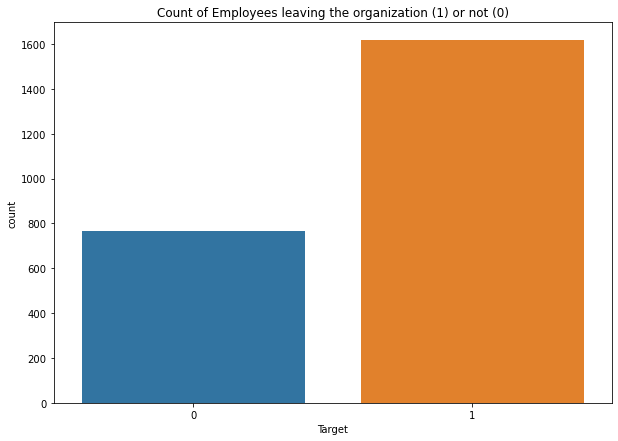

In [26]:
sns.countplot(df['Target'])
plt.title('Count of Employees leaving the organization (1) or not (0)')

In [27]:
#Getting the exact value counts
df['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

Text(0.5, 1.0, 'Histogram of Age')

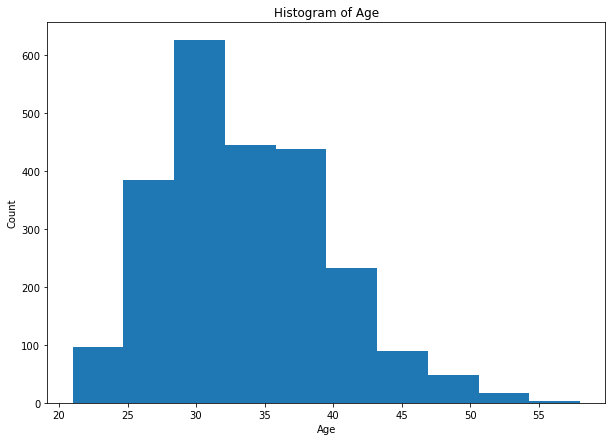

In [28]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Boxplot of Age')

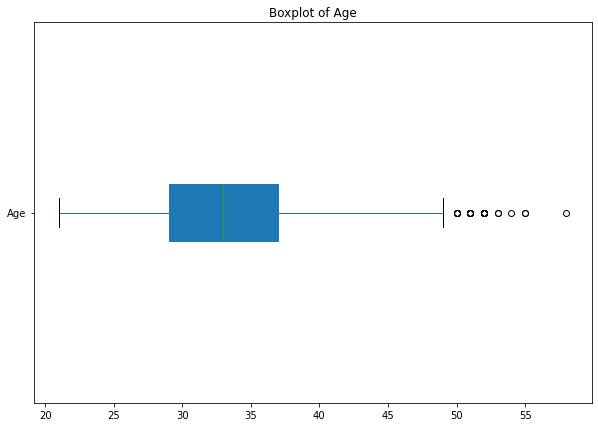

In [29]:
df['Age'].plot.box(patch_artist=True,vert=False)
plt.title('Boxplot of Age')

In [30]:
from scipy import stats

In [31]:
#Building a user-defined function to get the percentage of outliers in each column
def outlier_percentage(col):
    iqr=stats.iqr(df[col])
    uplim=df[col].quantile(0.75)+iqr*1.5
    no_of_outliers=len(df[df[col]>uplim])
    print(no_of_outliers)
    percent=round(no_of_outliers*100/len(df),2)
    print(percent,'%')

In [32]:
#Checking outliers in Age column
outlier_percentage('Age')

25
1.05 %


C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Gender')

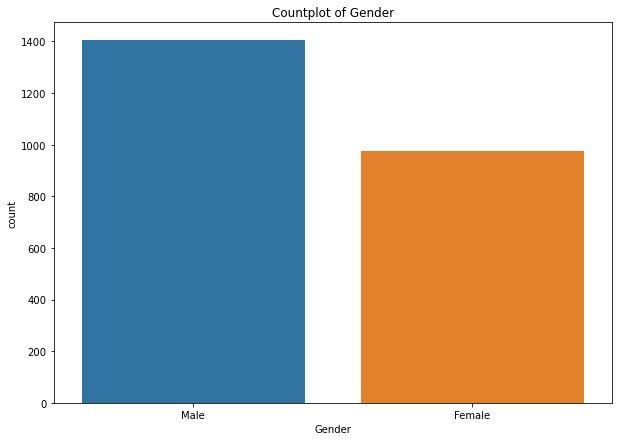

In [33]:
sns.countplot(df['Gender'])
plt.title('Countplot of Gender')

C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of City')

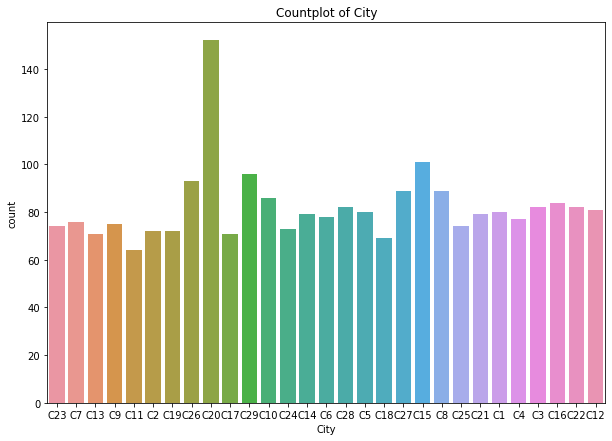

In [34]:
plt.rcParams['figure.figsize']=(10,7)
sns.countplot(df['City'])
plt.title('Countplot of City')

C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Education_Level')

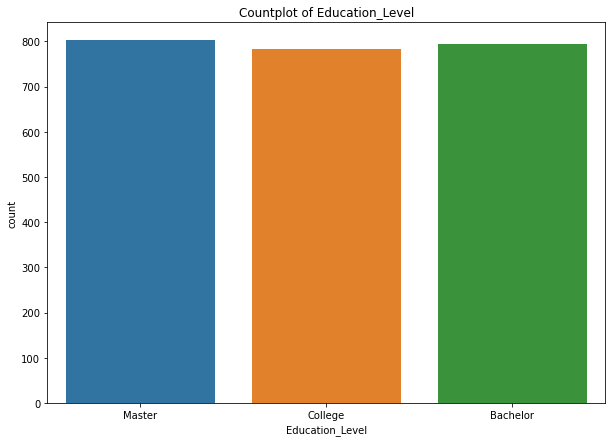

In [35]:
sns.countplot(df['Education_Level'])
plt.title('Countplot of Education_Level')

Text(0.5, 1.0, 'Histogram of Salary')

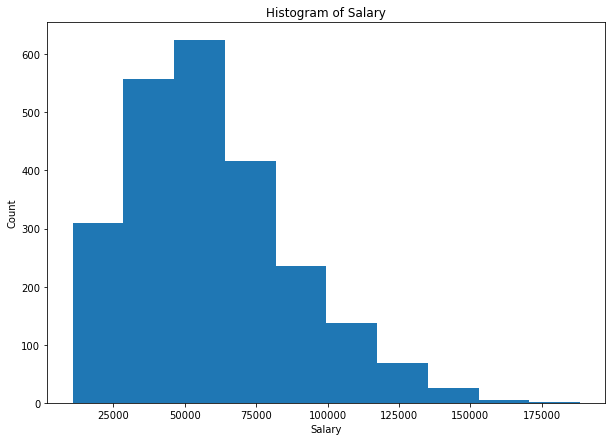

In [36]:
plt.hist(df['Salary'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram of Salary')

Text(0.5, 1.0, 'Boxplot of Salary')

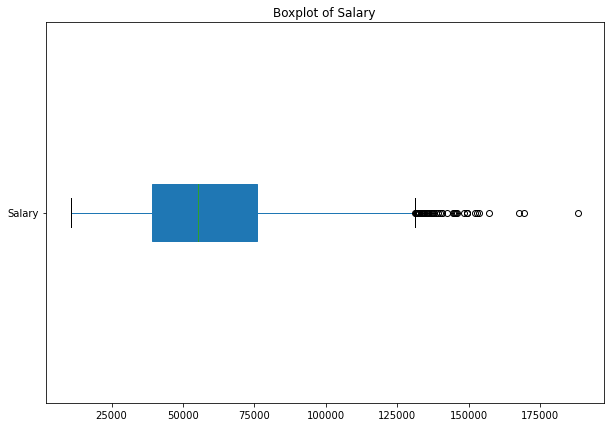

In [37]:
df['Salary'].plot.box(patch_artist=True,vert=False)
plt.title('Boxplot of Salary')

In [38]:
#Checking Outlier Percentage of Salary
outlier_percentage('Salary')

48
2.02 %


C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Joining Designation')

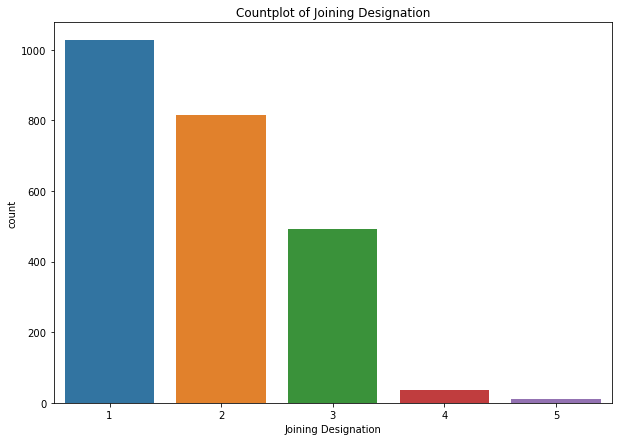

In [39]:
sns.countplot(df['Joining Designation'])
plt.title('Countplot of Joining Designation')

C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Designation')

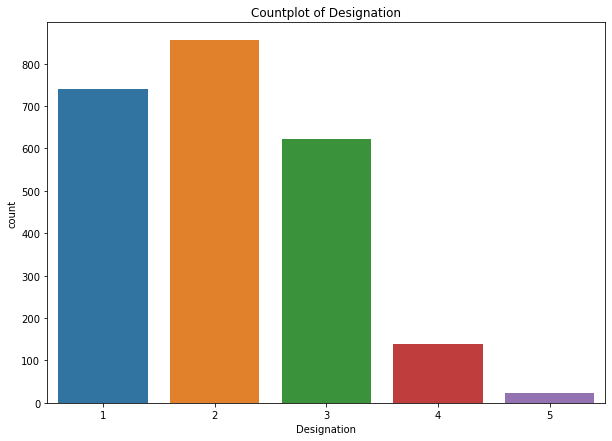

In [40]:
sns.countplot(df['Designation'])
plt.title('Countplot of Designation')

Text(0.5, 1.0, 'Histogram of Total Business Value')

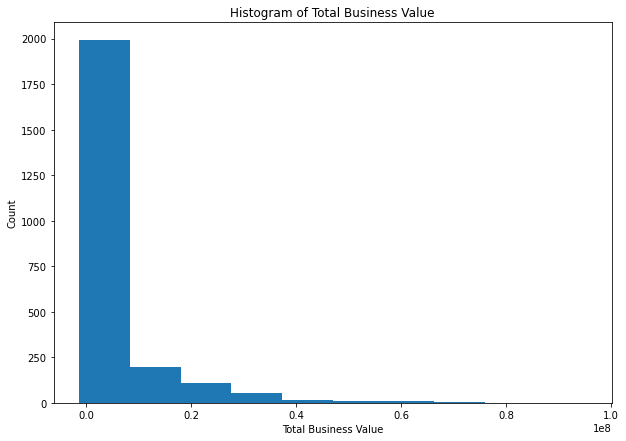

In [41]:
plt.hist(df['Total Business Value'])
plt.xlabel('Total Business Value')
plt.ylabel('Count')
plt.title('Histogram of Total Business Value')

Text(0.5, 1.0, 'Boxplot of Total Business Value')

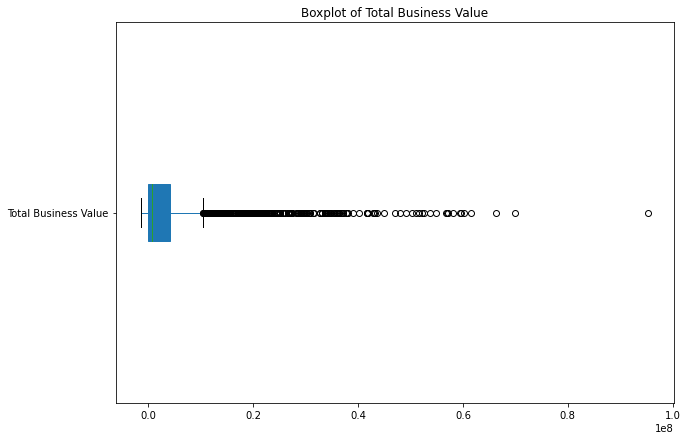

In [42]:
df['Total Business Value'].plot.box(patch_artist=True,vert=False)
plt.title('Boxplot of Total Business Value')

In [43]:
#Checking outlier percentage for Total Business Value
outlier_percentage('Total Business Value')

336
14.11 %


C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Quarterly Rating')

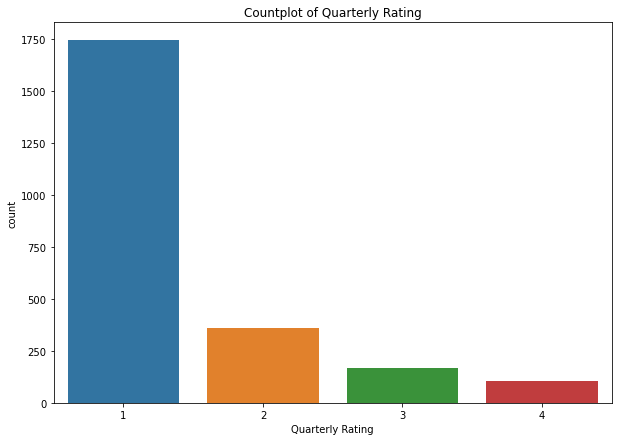

In [44]:
sns.countplot(df['Quarterly Rating'])
plt.title('Countplot of Quarterly Rating')

We need to convert the text columns into numerical categories for successfully training the model in machine learning algorithms and also contribute to the target variable

In [45]:
df['Gender']=df['Gender'].replace(['Male','Female'],[0,1])

In [46]:
df['Education_Level']=df['Education_Level'].replace(['College','Bachelor','Master'],[0,1,2])

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
df['City']=le.fit_transform(df['City'])

In [49]:
df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,0,15,2,57387,1,1,1715580,2,1
1,2,31,0,26,2,67016,2,2,0,1,0
2,4,43,0,4,2,65603,2,2,350000,1,1
3,5,29,0,28,0,46368,1,1,120360,1,1
4,6,31,1,2,1,78728,3,3,1265000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,0,16,0,82815,2,3,21748820,4,0
2377,2785,34,1,28,0,12105,1,1,0,1,1
2378,2786,45,0,10,0,35370,2,2,2815090,1,1
2379,2787,28,1,12,2,69498,1,1,977830,1,1


Standard Scaling the numerical columns

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [51]:
num_cols=df[['Age','Salary','Total Business Value']]

In [52]:
num_cols_scaled=sc.fit_transform(num_cols)
num_cols_scaled

array([[-0.94668243, -0.06861573, -0.31464103],
       [-0.44518787,  0.27069993, -0.50264571],
       [ 1.56079034,  0.22090732, -0.46429038],
       ...,
       [ 1.89512005, -0.84447128, -0.1941494 ],
       [-0.94668243,  0.35816296, -0.39548858],
       [-0.61235272,  0.38480359, -0.25078927]])

In [53]:
num_cols=pd.DataFrame(num_cols_scaled,columns=num_cols.columns)
num_cols

,Age,Salary,Total Business Value
0,-0.946682,-0.068616,-0.314641
1,-0.445188,0.270700,-0.502646
2,1.560790,0.220907,-0.464290
3,-0.779518,-0.456914,-0.489456
4,-0.445188,0.683418,-0.364019
...,...,...,...
2376,0.056307,0.827440,1.880735
2377,0.056307,-1.664305,-0.502646
2378,1.895120,-0.844471,-0.194149
2379,-0.946682,0.358163,-0.395489


In [54]:
df.drop(['Age','Salary','Total Business Value'],axis=1,inplace=True)

Concatenating the numerical scaled values with the transformed categorical values and forming a new dataframe

In [55]:
df=pd.concat([df,num_cols],axis=1)
df

,Emp_ID,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Target,Age,Salary,Total Business Value
0,1,0,15,2,1,1,2,1,-0.946682,-0.068616,-0.314641
1,2,0,26,2,2,2,1,0,-0.445188,0.270700,-0.502646
2,4,0,4,2,2,2,1,1,1.560790,0.220907,-0.464290
3,5,0,28,0,1,1,1,1,-0.779518,-0.456914,-0.489456
4,6,1,2,1,3,3,2,0,-0.445188,0.683418,-0.364019
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,16,0,2,3,4,0,0.056307,0.827440,1.880735
2377,2785,1,28,0,1,1,1,1,0.056307,-1.664305,-0.502646
2378,2786,0,10,0,2,2,1,1,1.895120,-0.844471,-0.194149
2379,2787,1,12,2,1,1,1,1,-0.946682,0.358163,-0.395489


Splitting the dataframe into dependent and independent variables

In [56]:
x=df.drop(['Emp_ID','Target'],axis=1)
y=df['Target']

Further splitting the datasets into train and test

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=121)

In [59]:
print(xtrain.shape,xtest.shape)

(1785, 9) (596, 9)


In [60]:
print(ytrain.shape,ytest.shape)

(1785,) (596,)


Training and Predicting the model with Random Forest Classification Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc=RandomForestClassifier(n_estimators=100)
rfcmodel=rfc.fit(xtrain,ytrain)
ypred_rfc=rfcmodel.predict(xtest)
ypred_rfc

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [64]:
confusion_matrix(ytest,ypred_rfc)

array([[102,  90],
       [ 41, 363]], dtype=int64)

In [65]:
print(classification_report(ytest,ypred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61       192
           1       0.80      0.90      0.85       404

    accuracy                           0.78       596
   macro avg       0.76      0.71      0.73       596
weighted avg       0.77      0.78      0.77       596



Training and Predicting the model with Logistic Regression Model

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
lr=LogisticRegression()
lrmodel=lr.fit(xtrain,ytrain)
ypred_lr=lrmodel.predict(xtest)
ypred_lr

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [150]:
confusion_matrix(ytest,ypred_lr)

array([[ 89, 103],
       [ 16, 388]], dtype=int64)

In [151]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.85      0.46      0.60       192
           1       0.79      0.96      0.87       404

    accuracy                           0.80       596
   macro avg       0.82      0.71      0.73       596
weighted avg       0.81      0.80      0.78       596



Training and Predicting the model with Decision Tree Classification Model

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dtc=DecisionTreeClassifier()
dtcmodel=dtc.fit(xtrain,ytrain)
ypred_dtc=dtcmodel.predict(xtest)
ypred_dtc

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [154]:
confusion_matrix(ytest,ypred_dtc)

array([[106,  86],
       [ 85, 319]], dtype=int64)

In [155]:
print(classification_report(ytest,ypred_dtc))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       192
           1       0.79      0.79      0.79       404

    accuracy                           0.71       596
   macro avg       0.67      0.67      0.67       596
weighted avg       0.71      0.71      0.71       596



Training and Predicting the model with Extreme Gradient Boosting Classification Model

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb=XGBClassifier(use_label_encoder=False)
xgbmodel=xgb.fit(xtrain,ytrain)
ypred_xgb=xgbmodel.predict(xtest)
ypred_xgb

[10:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [68]:
confusion_matrix(ytest,ypred_xgb)

array([[ 95,  97],
       [ 43, 361]], dtype=int64)

In [69]:
print(classification_report(ytest,ypred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.49      0.58       192
           1       0.79      0.89      0.84       404

    accuracy                           0.77       596
   macro avg       0.74      0.69      0.71       596
weighted avg       0.76      0.77      0.75       596



Training and Predicting the model with Support Vector Classification Model

In [70]:
from sklearn.svm import SVC

In [71]:
svc=SVC(kernel='linear',C=1,gamma='auto',probability=True)
svcmodel=svc.fit(xtrain,ytrain)
ypred_svc=svcmodel.predict(xtest)
ypred_svc

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [72]:
confusion_matrix(ytest,ypred_svc)

array([[ 88, 104],
       [ 18, 386]], dtype=int64)

In [73]:
print(classification_report(ytest,ypred_svc))

              precision    recall  f1-score   support

           0       0.83      0.46      0.59       192
           1       0.79      0.96      0.86       404

    accuracy                           0.80       596
   macro avg       0.81      0.71      0.73       596
weighted avg       0.80      0.80      0.78       596



Training and Predicting the model with Adaboost Classification Model

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
abc=AdaBoostClassifier()
abcmodel=abc.fit(xtrain,ytrain)
ypred_abc=abcmodel.predict(xtest)
ypred_abc

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [76]:
confusion_matrix(ytest,ypred_abc)

array([[ 92, 100],
       [ 21, 383]], dtype=int64)

In [77]:
print(classification_report(ytest,ypred_abc))

              precision    recall  f1-score   support

           0       0.81      0.48      0.60       192
           1       0.79      0.95      0.86       404

    accuracy                           0.80       596
   macro avg       0.80      0.71      0.73       596
weighted avg       0.80      0.80      0.78       596



Training and Predicting the model with Gradient Boosting Classification Model

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gbc=GradientBoostingClassifier()
gbcmodel=gbc.fit(xtrain,ytrain)
ypred_gbc=gbcmodel.predict(xtest)
ypred_gbc

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [80]:
confusion_matrix(ytest,ypred_gbc)

array([[ 92, 100],
       [ 28, 376]], dtype=int64)

In [81]:
print(classification_report(ytest,ypred_gbc))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59       192
           1       0.79      0.93      0.85       404

    accuracy                           0.79       596
   macro avg       0.78      0.70      0.72       596
weighted avg       0.78      0.79      0.77       596



# Importing the test data

In [82]:
test=pd.read_csv('test_hXY9mYw.csv')
test.sample(10)

,Emp_ID
560,80
11,2727
588,14
377,441
696,824
173,580
20,1043
100,2200
592,754
404,1956


Now we need the performance variables for the employees with their employee id in test data. Hence, we will inner join the test dataframe with train dataframe on the basis of common 'Emp_ID' in both of them. Through this we would get the parameters of that particular employee in the same order as in the test data

In [83]:
test1=pd.merge(test,df,on='Emp_ID')

In [84]:
test1

,Emp_ID,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Target,Age,Salary,Total Business Value
0,394,1,12,2,2,4,3,0,0.056307,1.352747,2.506409
1,173,0,20,0,1,3,3,0,0.892131,-0.111361,1.674435
2,1090,0,4,0,2,4,2,0,0.892131,1.318494,5.018603
3,840,1,27,0,1,4,2,0,1.059296,1.038803,1.375016
4,308,0,24,2,2,5,2,0,-0.278023,4.548777,5.856064
...,...,...,...,...,...,...,...,...,...,...,...
736,2134,0,21,0,2,5,1,0,1.059296,1.997055,6.039289
737,2255,0,17,0,3,4,3,0,1.059296,2.613137,3.486099
738,448,0,1,1,2,4,3,0,0.557801,0.213366,2.819888
739,1644,1,28,1,2,4,1,0,2.396615,1.627293,2.658136


Dropping the target variable and employee id column for prediction

In [86]:
test1.drop(['Target','Emp_ID'],axis=1,inplace=True)

In [87]:
test1.head()

,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Age,Salary,Total Business Value
0,1,12,2,2,4,3,0.056307,1.352747,2.506409
1,0,20,0,1,3,3,0.892131,-0.111361,1.674435
2,0,4,0,2,4,2,0.892131,1.318494,5.018603
3,1,27,0,1,4,2,1.059296,1.038803,1.375016
4,0,24,2,2,5,2,-0.278023,4.548777,5.856064


# Prediction

In [88]:
prediction=abcmodel.predict(test1)

In [89]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

Checking the value counts of zeros and ones in the predicted array

In [90]:
np.unique(prediction,return_counts=True)

(array([0, 1]), array([421, 320], dtype=int64))

# Importing submission file

In [91]:
submission=pd.read_csv('sample_submission_znWiLZ4.csv')

Putting prediction array in the Target column of Submission dataframe

In [92]:
submission['Target']=prediction

In [93]:
submission

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,1


Exporting the dataframe in csv format

In [94]:
submission.to_csv('Submission_6.csv',index=False)